In [1]:
import xspec
import batanalysis as ba
from swifttools.swift_too import GUANO, ObsQuery, Clock
import swiftbat

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from pathlib import Path
from astropy.io import fits
from astropy.time import Time, TimeDelta
import astropy.units as u
from astropy.coordinates import SkyCoord
import datetime
import os

In [2]:
tmp_download_dir="/tmp/batdata/download_examples"

ba.datadir(tmp_download_dir, mkdir=True)

PosixPath('/private/tmp/batdata/download_examples')

In [3]:
t=Time("2024-07-29T12:05:16")

In [4]:
result = ba.download_swift_trigger_data(triggertime=t.datetime, timewindow=400)

/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: SWIFT_TLE_ARCHIVE.txt.24219.58610885.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw03104687002pat.fits.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw03104687002pjb.par.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw03104687002pob.cat.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw03104687002ppr

/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: SWIFT_TLE_ARCHIVE.txt.24219.58610885.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw03104687002pat.fits.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw03104687002pjb.par.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw03104687002pob.cat.gz exists and not overwritten (set clobber=True to override this).
/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/swifttools/swift_too/swift_data.py:405: UserWarning: sw03104687002ppr

In [5]:
event=ba.BatEvent(result[1245446][0].obsid, obs_dir=result[1245446][0].entries[0].outdir)

In [6]:
eresolved_skyview=event.create_skyview(energybins=[15,25,50,100,350]*u.keV)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 60520.503970 from DATE-OBS.
Set MJD-END to 60520.504086 from DATE-END'. [astropy.wcs.wcs]


/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/astropy/units/decorators.py:313: UserWarning: No astropy World Coordinate System has been specified the sky image is assumed to be in the detector tangent plane. No conversion to Healpix or RA/Dec & galactic coordinate systems will be possible.


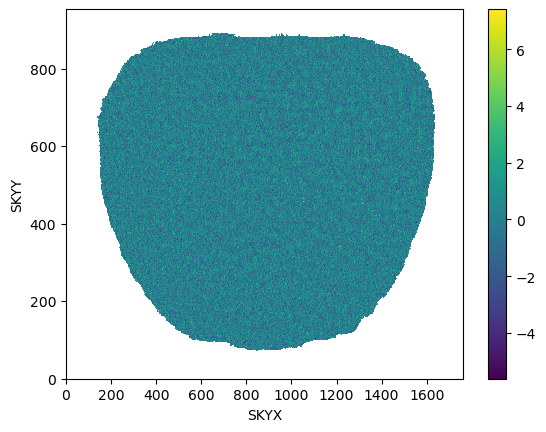

In [8]:
ax = eresolved_skyview.snr_img.plot(emin=15*u.keV, emax=25*u.keV) #, projection="healpix", coordsys="icrs")
plt.savefig("/Users/tparsota/Downloads/norm_ra_dec_localization.pdf")

In [14]:
eresolved_sources = eresolved_skyview.detect_sources()
c=eresolved_sources["SKYCOORD"][0]
eresolved_sources

CATNUM,NAME,SKYCOORD,ALWAYS_CLEAN,TIME,TIME_STOP,EXPOSURE,IMX,IMY,IMX_ERR,IMY_ERR,IMXPIX,IMYPIX,RA_OBJ_ERR,DEC_OBJ_ERR,ERR_RAD,IMX_FWHM,IMY_FWHM,IMX_FHWM_ERR,IMY_FHWM_ERR,THETA,PHI,GRMCLON,GRMCLAT,COUNTS,COUNTS_ERR,CENT_COUNTS,CONTAM_COUNTS,BKG,BKG_ERR,BKG_VAR,BKG_CELL,BKG_FIT,SNR,CENT_SNR,NPIXSOU,NPIXBKG,DETECT_METHOD,CHI2,DOF,CHI2_NU,DETECT_STATUS,CONSTRAINT_FLAG,SRC_WINDOW_RAD,BKG_WINDOW_RAD,NGOODPIX,BAT_ZOBJ,PCODEFR,RA_PER_IMX,DEC_PER_IMX,RA_PER_IMY,DEC_PER_IMY,GAINAPP,CLOCKAPP,BACKAPP,ACOLAPP,PCODEAPP,FFAPP,NGPIXAPP,BDISTAPP,MSKWTAPP
,,"deg,deg",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int16,str30,SkyCoord,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[4],float64[4],float64[4],float64[4],float64[4],float64[4],float64[4],float64[4],float64[4],float64[4],float64[4],int32,int32,int32,float64[4],float64[4],float64[4],int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,int32,int32,int32,int32,int32
288,EXO 0748-676,"117.1387990706308,-67.74999973848065",True,743947548.0,743947558.0726,10.0726000070572,-0.3641805942572555,-0.03985463758566557,0.0,0.0,1053.003744668743,457.69106994506603,0.0,0.0,0.0,0.006529800274994075,0.006529800274994075,0.0,0.0,20.12055482356446,173.75460550885555,2.2822946461403633,-19.99602696325525,0.17714331320174045 .. -0.018003728938946643,0.023886153915319727 .. 0.017321794972571934,0.15460082435017142 .. -0.02270586598999525,-0.004698480600171431 .. -0.00024335276000474844,-0.004698480600171431 .. -0.00024335276000474844,0.008115403102498172 .. 0.005860116054339924,0.02076748199760914 .. 0.015115301124751568,-0.004179818090051413 .. -0.004179818090051413,-0.004698480600171431 .. -0.00024335276000474844,8.529840701060154 .. -1.1910929719729648,7.4443702114666515 .. -1.502177548604308,0,0,2,134.74914844437572 .. 154.46631263816303,111.0 .. 111.0,1.2139562922916731 .. 1.3915884021456129,0,11,6,30,16211,0.0,0.9765625,133.5034505132171,-0.7058258120196115,0.04759763783113158,53.76131494472247,1,0,0,1,1,1,1,0,1
8049,ESO 323-32,"193.33500339863548,-41.63700182309321",False,743947548.0,743947558.0726,10.0726000070572,0.5075150217288837,-0.12613100200079821,0.0,0.0,638.029213779816,416.6592947985648,0.0,0.0,0.0,0.006529800274994075,0.006529800274994075,0.0,0.0,27.607482161801208,13.95676426318091,7.188812135084492,26.726421351656757,0.011664979631504799 .. 0.005822179546161984,0.02721334516674728 .. 0.020036818089389202,0.006147182609326206 .. -0.003714795690136449,0.001543247078173794 .. 0.002738233190136449,0.001543247078173794 .. 0.002738233190136449,0.009176040332086946 .. 0.0067816024655946595,0.0237262025475502 .. 0.01751946657896042,0.0009246596600860357 .. 0.0009246596600860357,0.001543247078173794 .. 0.002738233190136449,0.4916496691000913 .. 0.3323263022833121,0.2590883474507352 .. -0.21203817327393082,0,0,2,83.33357974992258 .. 86.97581846606437,111.0 .. 111.0,0.7507529707200232 .. 0.783565932126706,0,11,6,30,16211,0.0,0.78125,24.573703001351532,41.462459961394416,-60.077187953311295,23.01341152843861,1,0,0,1,1,1,1,0,1
8047,1H 1249-637,"190.70899974739177,-63.058000576560254",False,743947548.0,743947558.0726,10.0726000070572,0.11700980082572328,-0.26144376512373807,0.0,0.0,823.9367247715002,352.2218533455966,0.0,0.0,0.0,0.006529800274994075,0.006529800274994075,0.0,0.0,15.983485264191552,65.88897979501478,14.651672663269553,6.458661609518421,-0.02475284655994056 .. 0.03971412010814947,0.027226048979177325 .. 0.01931051181025057,-0.03836168912934764 .. 0.029652624181431643,-0.006071904620652359 .. 0.007822961756068357,-0.006071904620652359 .. 0.007822961756068357,0.009112018916195962 .. 0.006459513989889497,0.023945514112710953 .. 0.016985474154353142,-0.001155812293291092 .. -0.001155812293291092,-0.006071904620652359 .. 0.007822961756068357,-1.0337153941832076 .. 2.3381225479638017,-1.602040739187311 .. 1.74

In [18]:
event.apply_mask_weighting(ra=c.ra, dec=c.dec)

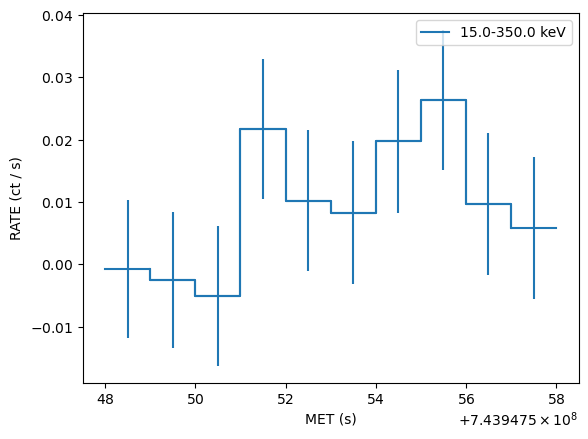

In [19]:
lc=event.create_lightcurve()
lc.set_timebins(timebinalg="uniform", timedelta=np.timedelta64(1, 's'))

fig, ax = lc.plot(energybins=[15,350]*u.keV)

(<Figure size 640x480 with 2 Axes>,
 array([<Axes: ylabel='RATE (ct / s)'>,
        <Axes: xlabel='MET - T0 (T0= 743947549.895255 s)', ylabel='Fractional Exposure'>],
       dtype=object))

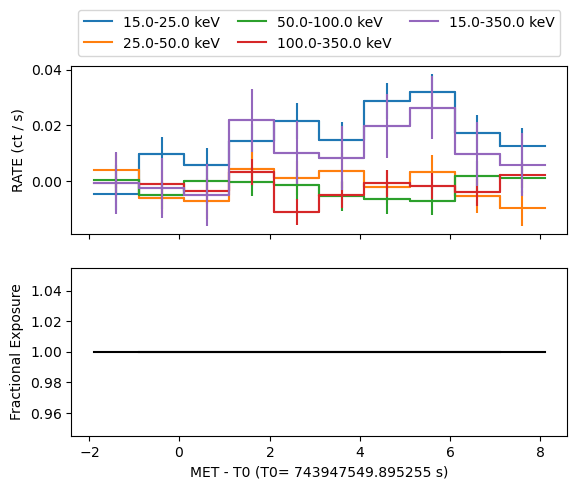

In [20]:
event.trigtime=Clock(utctime=t)

lc.plot(plot_relative=True, T0=event.trigtime.mettime, plot_exposure_fraction=True)


In [21]:
spectra=event.create_pha(tstart=lc.tbins["TIME_START"], tstop=lc.tbins["TIME_STOP"])


1 spectrum  in use
 
Spectral Data File: t_743947548.0-743947549.0_80chan.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.844e-04 +/- 1.404e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947548.0-743947549.0_80chan.rsp for Source 1


Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared                  


1 spectrum  in use
 
Spectral Data File: t_743947550.0-743947551.0_80chan.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.482e-03 +/- 1.339e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947550.0-743947551.0_80chan.rsp for Source 1


Fit statistic  : Chi-Squared                   77.70     using 80 bins.

Test statistic : Chi-Squared                   77.70     using 80 bins.
 Null hypothesis probability of 4.88e-01 with 78 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw


1 spectrum  in use
 
Spectral Data File: t_743947552.0-743947553.0_80chan.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.811e-02 +/- 1.469e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947552.0-743947553.0_80chan.rsp for Source 1


Fit statistic  : Chi-Squared                   77.85     using 80 bins.

Test statistic : Chi-Squared                   77.85     using 80 bins.
 Null hypothesis probability of 4.84e-01 with 78 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw


Fit statistic  : Chi-Squared                  110.28     using 80 bins.

Test statistic : Chi-Squared                  110.28     using 80 bins.
 Null hypothesis probability of 9.46e-03 with 78 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared                  100.51     using 80 bins.

Test statistic : Chi-Squared                  100.51     using 80 bins.
 Null hypothesis probability of 3.73e-02 with 77 degrees of free


1 spectrum  in use
 
Spectral Data File: t_743947556.0-743947557.0_80chan.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.942e-02 +/- 1.605e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947556.0-743947557.0_80chan.rsp for Source 1


Fit statistic  : Chi-Squared                   87.52     using 80 bins.

Test statistic : Chi-Squared                   87.52     using 80 bins.
 Null hypothesis probability of 2.16e-01 with 78 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw

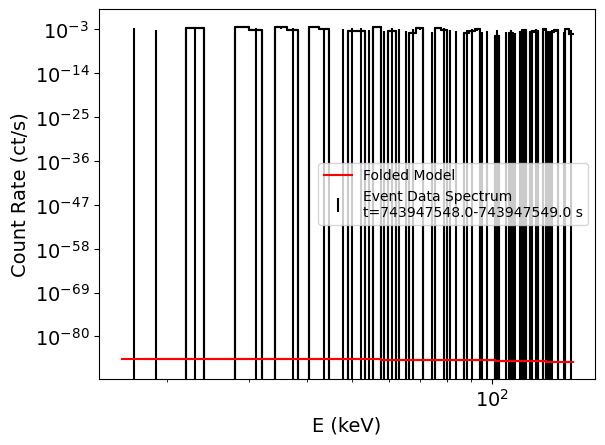

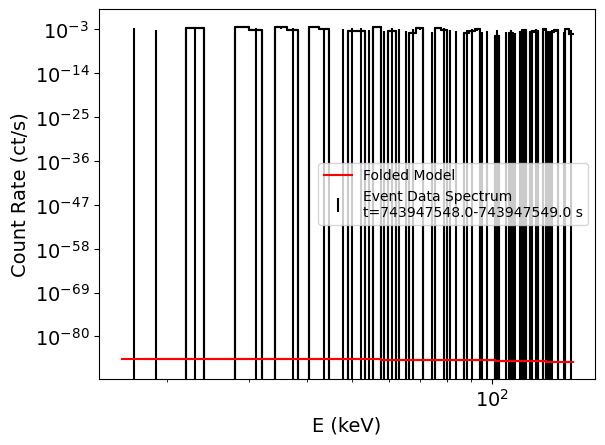

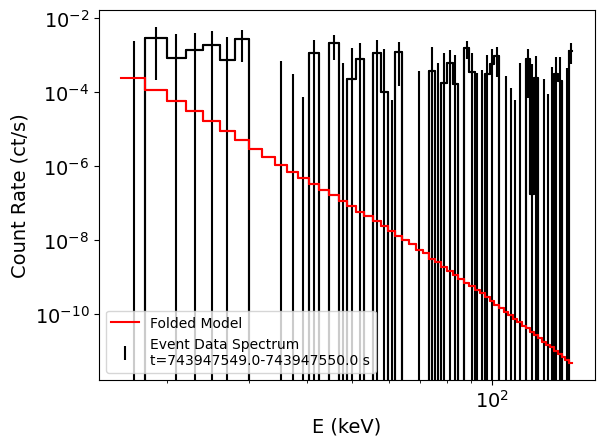

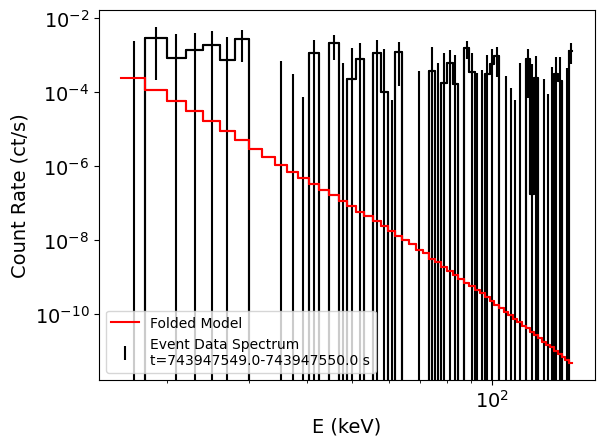

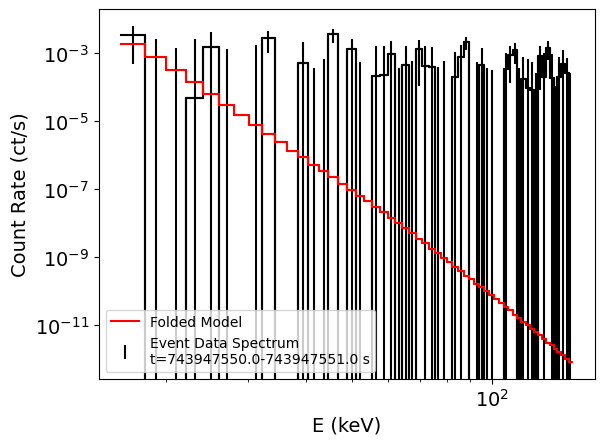

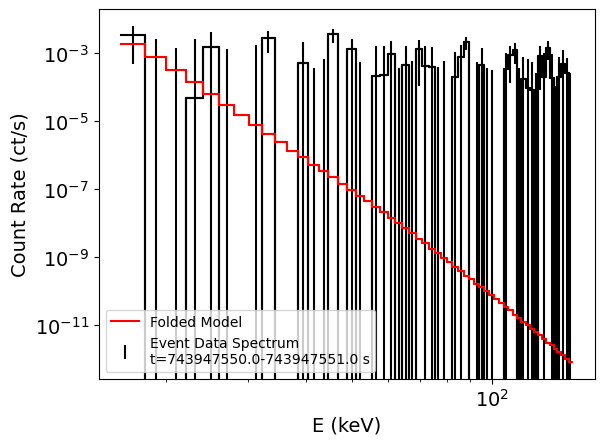

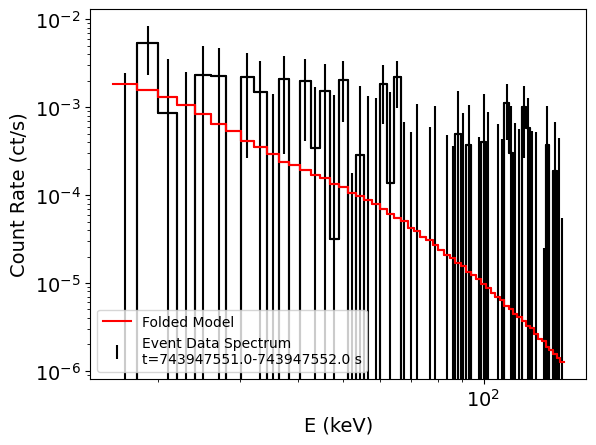

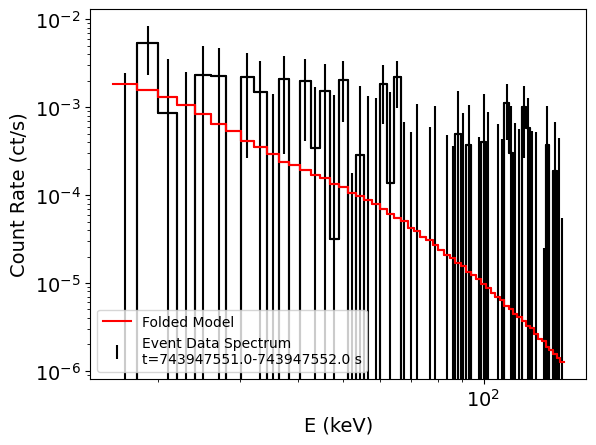

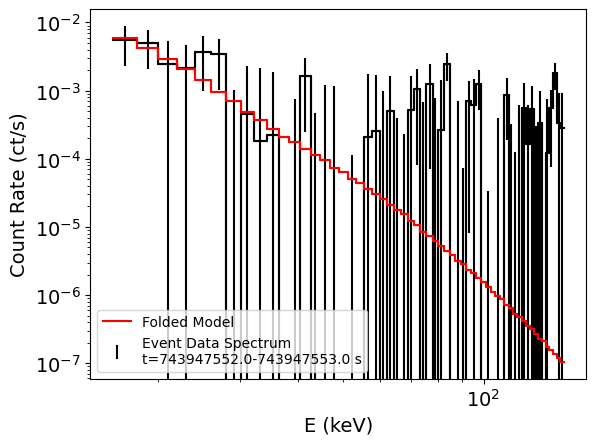

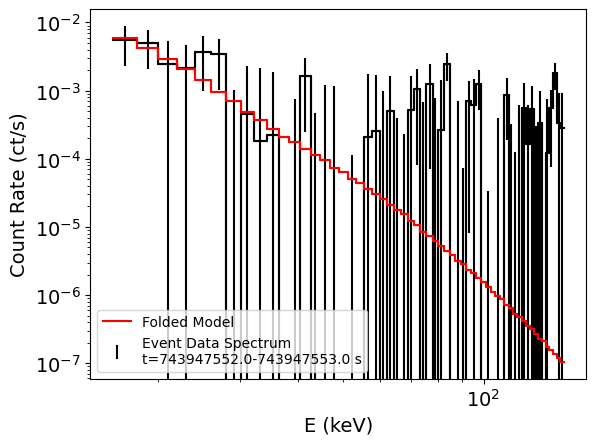

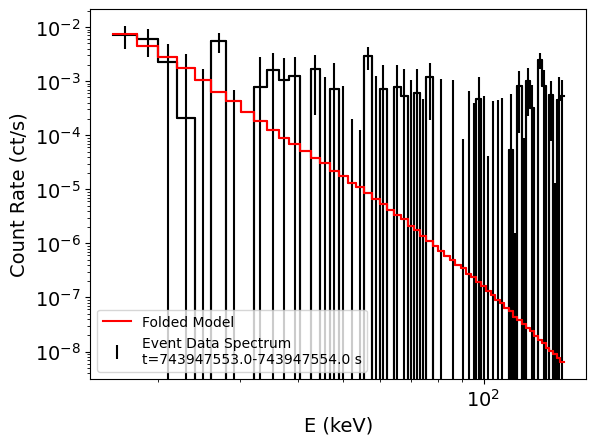

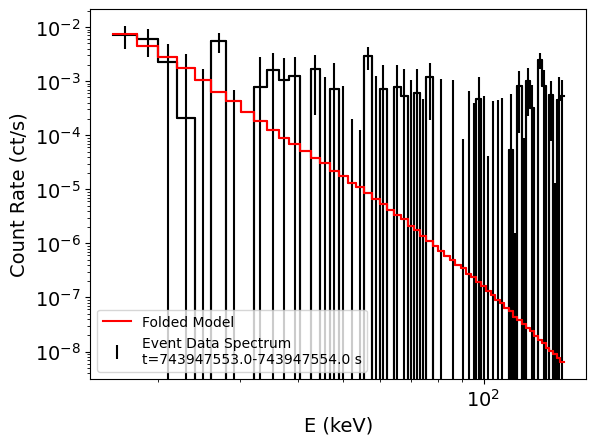

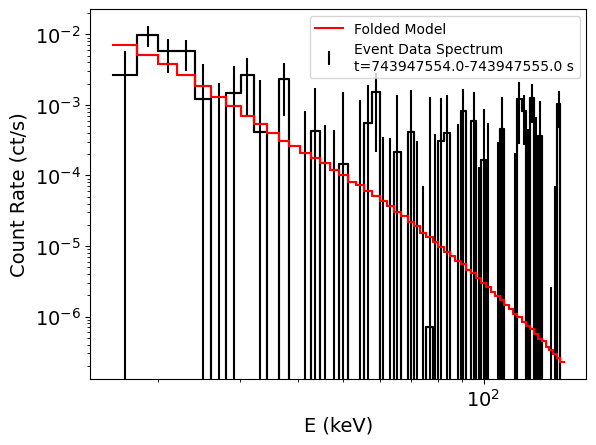

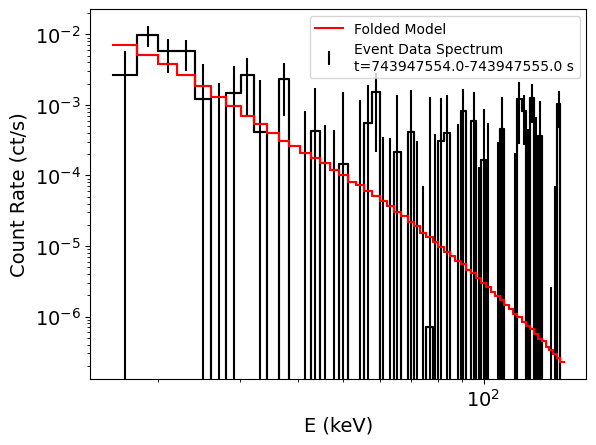

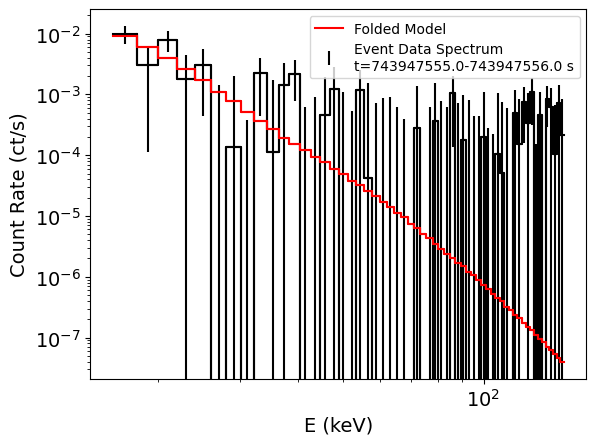

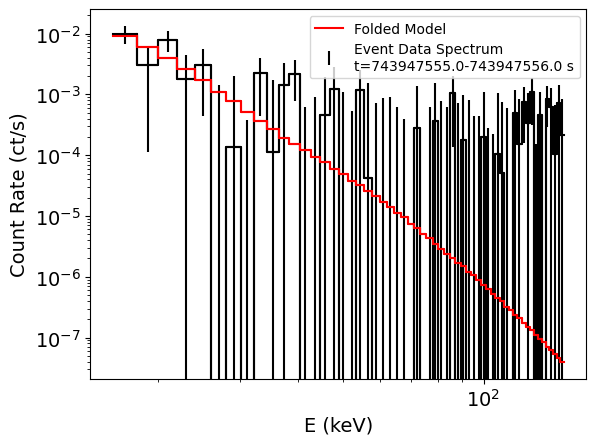

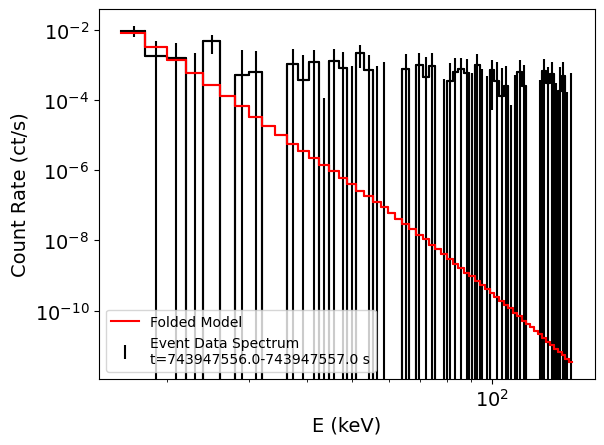

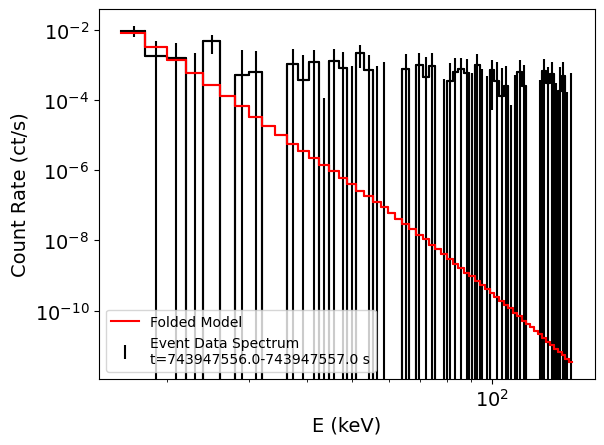

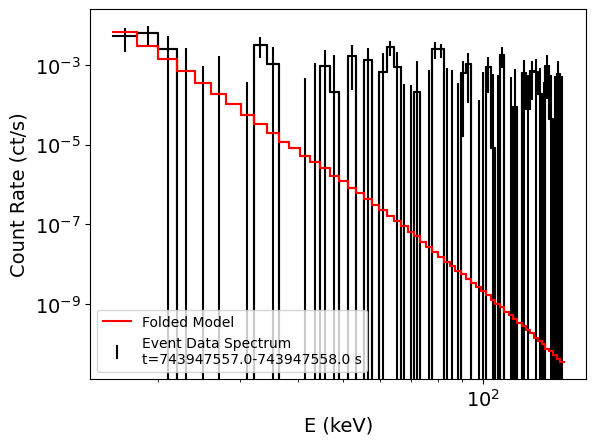

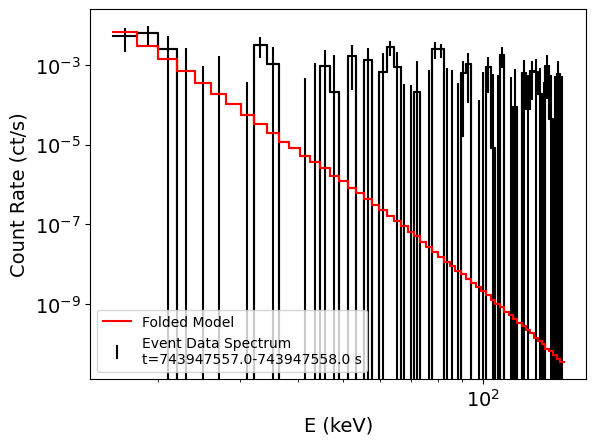

In [22]:
for i in spectra:
    ba.fit_spectrum(i, use_cstat=False, generic_model="cflux*po", setPars={1:"15,-1", 2:"150,-1",3:-8, 4:"2",5:"1e-3,-1"}, fit_iterations=10000)
    i.plot()

In [23]:
upperlim_spectra=ba.parallel.batspectrum_analysis(spectra, use_cstat=False, generic_model="cflux*po", setPars={1:"15,-1", 2:"150,-1",3:-8, 4:"2",5:"1e-3,-1"}, fit_iterations=10000, ul_pl_index=1, recalc=True)


1 spectrum  in use
 
Spectral Data File: t_743947548.0-743947549.0_80chan.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.844e-04 +/- 1.404e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947548.0-743947549.0_80chan.rsp for Source 1


Fit statistic  : Chi-Squared                  264.98     using 80 bins.

Test statistic : Chi-Squared                  264.98     using 80 bins.
 Null hypothesis probability of 3.39e-22 with 78 degrees of freedom
 Current data and model not fit yet.

Model cflux<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   cflux      Emin       keV      0.500000     frozen
   2    1   cflux      Emax       keV      10.0000      frozen
   3    1   cflux      lg10Flux   cgs      -12.0000     +/-  0.0          
   4    2   powerlaw


1 spectrum  in use
 
Spectral Data File: t_743947549.0-743947550.0_80chan_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.539e-01 +/- 2.988e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947549.0-743947550.0_80chan.rsp for Source 1


Fit statistic  : Chi-Squared                44752.00     using 80 bins.

Test statistic : Chi-Squared                44752.00     using 80 bins.
 Null hypothesis probability of 0.00e+00 with 78 degrees of freedom
 Current data and model not fit yet.

Model powerlaw<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   powerlaw   PhoIndex            1.00000      +/-  0.0          
   2    1   powerlaw   norm                1.00000      +/-  0.0          
___________________________________________________________


1 spectrum  in use
 
Spectral Data File: t_743947550.0-743947551.0_80chan_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.727e-01 +/- 3.002e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947550.0-743947551.0_80chan.rsp for Source 1


Fit statistic  : Chi-Squared                44821.67     using 80 bins.

Test statistic : Chi-Squared                44821.67     using 80 bins.
 Null hypothesis probability of 0.00e+00 with 78 degrees of freedom
 Current data and model not fit yet.

Model powerlaw<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   powerlaw   PhoIndex            1.00000      +/-  0.0          
   2    1   powerlaw   norm                1.00000      +/-  0.0          
___________________________________________________________


1 spectrum  in use
 
Spectral Data File: t_743947551.0-743947552.0_80chan_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.662e-01 +/- 2.972e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947551.0-743947552.0_80chan.rsp for Source 1


Fit statistic  : Chi-Squared                43999.29     using 80 bins.

Test statistic : Chi-Squared                43999.29     using 80 bins.
 Null hypothesis probability of 0.00e+00 with 78 degrees of freedom
 Current data and model not fit yet.

Model powerlaw<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   powerlaw   PhoIndex            1.00000      +/-  0.0          
   2    1   powerlaw   norm                1.00000      +/-  0.0          
___________________________________________________________


1 spectrum  in use
 
Spectral Data File: t_743947552.0-743947553.0_80chan_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.708e-01 +/- 3.058e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947552.0-743947553.0_80chan.rsp for Source 1


Fit statistic  : Chi-Squared                44076.68     using 80 bins.

Test statistic : Chi-Squared                44076.68     using 80 bins.
 Null hypothesis probability of 0.00e+00 with 78 degrees of freedom
 Current data and model not fit yet.

Model powerlaw<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   powerlaw   PhoIndex            1.00000      +/-  0.0          
   2    1   powerlaw   norm                1.00000      +/-  0.0          
___________________________________________________________


1 spectrum  in use
 
Spectral Data File: t_743947553.0-743947554.0_80chan_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.766e-01 +/- 2.993e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947553.0-743947554.0_80chan.rsp for Source 1


Fit statistic  : Chi-Squared                44316.00     using 80 bins.

Test statistic : Chi-Squared                44316.00     using 80 bins.
 Null hypothesis probability of 0.00e+00 with 78 degrees of freedom
 Current data and model not fit yet.

Model powerlaw<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   powerlaw   PhoIndex            1.00000      +/-  0.0          
   2    1   powerlaw   norm                1.00000      +/-  0.0          
___________________________________________________________


1 spectrum  in use
 
Spectral Data File: t_743947554.0-743947555.0_80chan_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.811e-01 +/- 3.033e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947554.0-743947555.0_80chan.rsp for Source 1


Fit statistic  : Chi-Squared                43674.70     using 80 bins.

Test statistic : Chi-Squared                43674.70     using 80 bins.
 Null hypothesis probability of 0.00e+00 with 78 degrees of freedom
 Current data and model not fit yet.

Model powerlaw<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   powerlaw   PhoIndex            1.00000      +/-  0.0          
   2    1   powerlaw   norm                1.00000      +/-  0.0          
___________________________________________________________


1 spectrum  in use
 
Spectral Data File: t_743947555.0-743947556.0_80chan_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.749e-01 +/- 3.034e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947555.0-743947556.0_80chan.rsp for Source 1


Fit statistic  : Chi-Squared                43911.25     using 80 bins.

Test statistic : Chi-Squared                43911.25     using 80 bins.
 Null hypothesis probability of 0.00e+00 with 78 degrees of freedom
 Current data and model not fit yet.

Model powerlaw<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   powerlaw   PhoIndex            1.00000      +/-  0.0          
   2    1   powerlaw   norm                1.00000      +/-  0.0          
___________________________________________________________


1 spectrum  in use
 
Spectral Data File: t_743947556.0-743947557.0_80chan_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.779e-01 +/- 2.958e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947556.0-743947557.0_80chan.rsp for Source 1


Fit statistic  : Chi-Squared                44773.03     using 80 bins.

Test statistic : Chi-Squared                44773.03     using 80 bins.
 Null hypothesis probability of 0.00e+00 with 78 degrees of freedom
 Current data and model not fit yet.

Model powerlaw<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   powerlaw   PhoIndex            1.00000      +/-  0.0          
   2    1   powerlaw   norm                1.00000      +/-  0.0          
___________________________________________________________


1 spectrum  in use
 
Spectral Data File: t_743947557.0-743947558.0_80chan_bkgnsigma_5_upperlim.pha  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.747e-01 +/- 2.978e-02
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-80
  Telescope: SWIFT Instrument: BAT  Channel Type: PI
  Exposure Time: 1 sec
 Using fit statistic: chi
 Using Response (RMF) File            t_743947557.0-743947558.0_80chan.rsp for Source 1


Fit statistic  : Chi-Squared                44667.82     using 80 bins.

Test statistic : Chi-Squared                44667.82     using 80 bins.
 Null hypothesis probability of 0.00e+00 with 78 degrees of freedom
 Current data and model not fit yet.

Model powerlaw<1> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   powerlaw   PhoIndex            1.00000      +/-  0.0          
   2    1   powerlaw   norm                1.00000      +/-  0.0          
___________________________________________________________

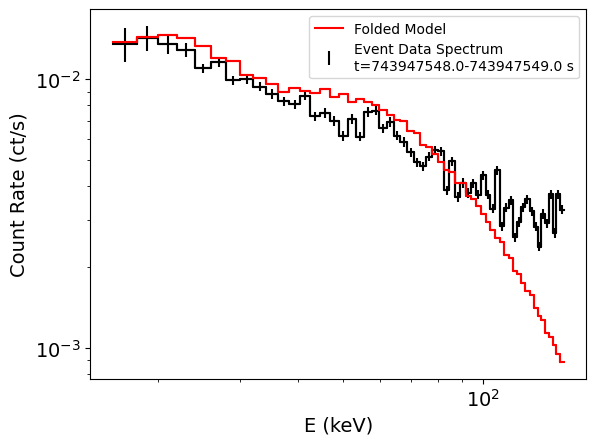

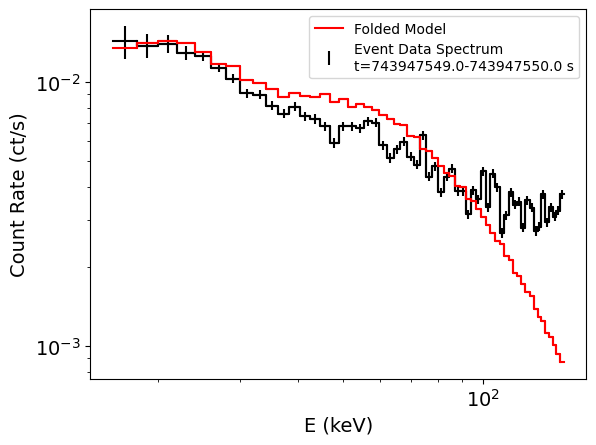

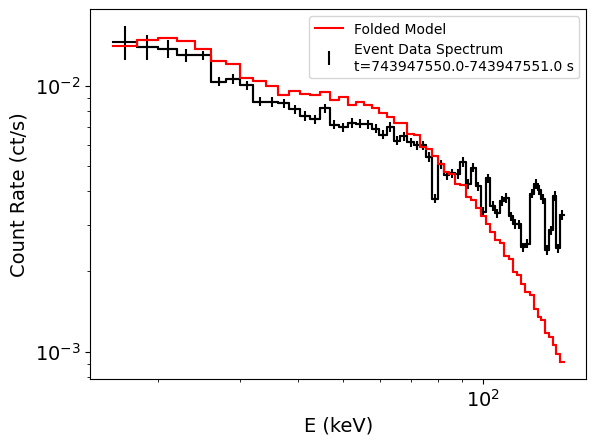

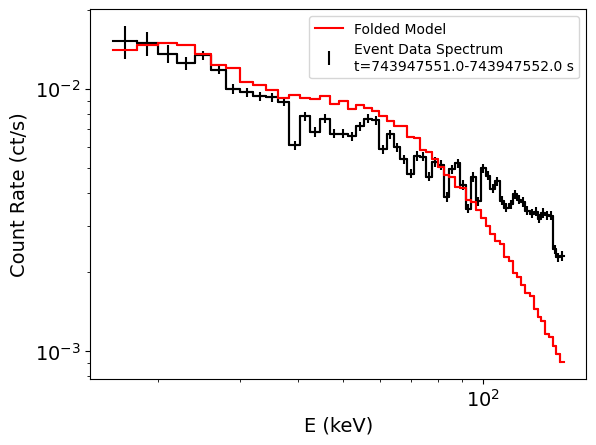

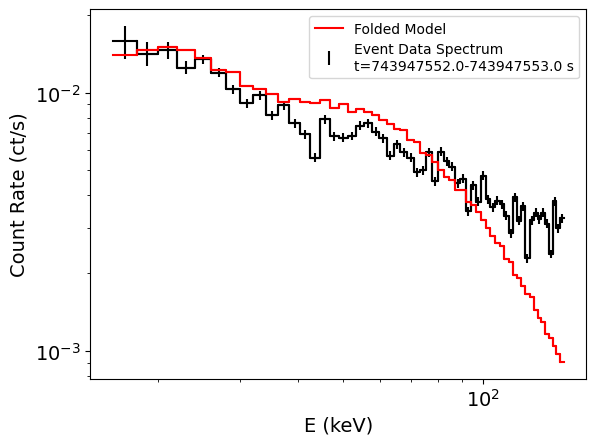

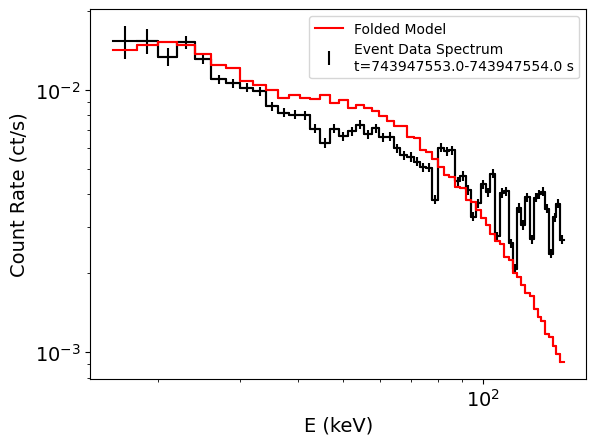

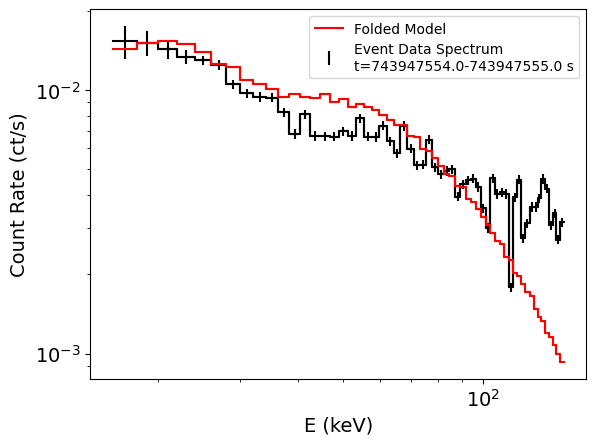

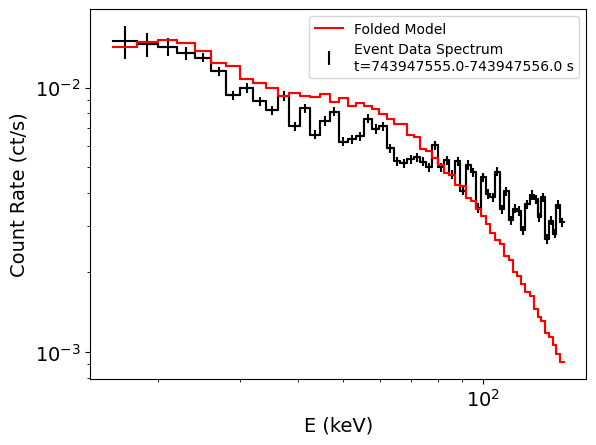

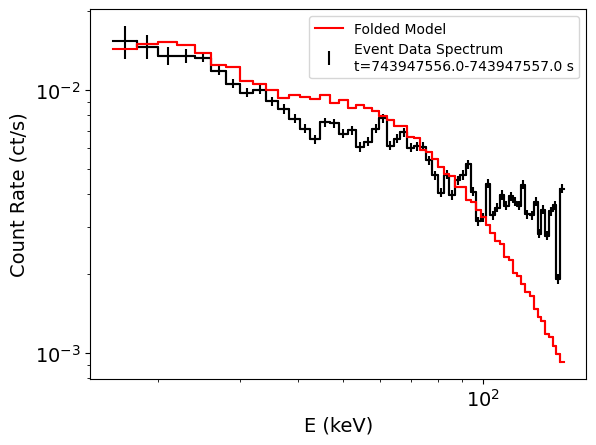

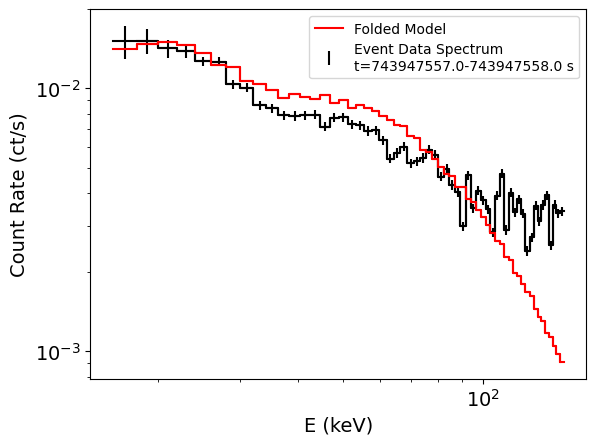

In [24]:
for i in upperlim_spectra:
    i.plot()

/Users/tparsota/opt/anaconda3/envs/py311/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.


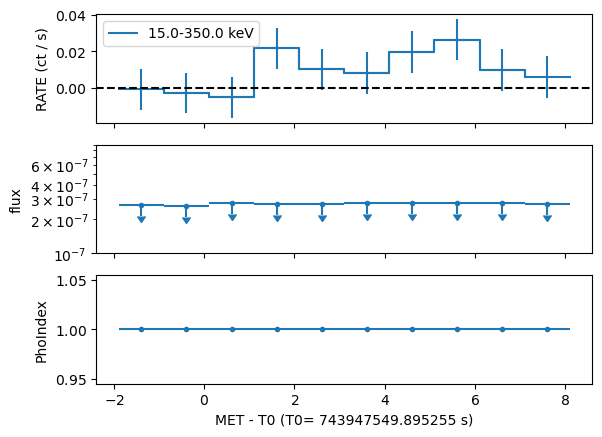

In [26]:
fig, ax = ba.plot_TTE_lightcurve(lc, upperlim_spectra, plot_relative=True, T0=event.trigtime.met)
ax[0].axhline(0, ls="--", color="k")
ax[1].set_ylim([1e-7, 9e-7])
fig.savefig("/Users/tparsota/Downloads/exo_lc.pdf", bbox_inches="tight")